# Análisis de Frecuencia de Clientes Wi-Fi

Este notebook permite identificar clientes frecuentes y esporádicos a partir de los datos de RSSI recolectados.

In [4]:
import client_analysis as ca
import matplotlib.pyplot as plt
import os

import seaborn as sns
import matplotlib.pyplot as plt


# Configuración del gráfico
%matplotlib inline
plt.style.use('ggplot')

## 1. Configuración de Datos
Cambia la variable `CSV_PATH` para apuntar al archivo que deseas analizar.

In [6]:
# Ejemplo: Edificio 990, Octubre
CSV_PATH = "buildings/990/rssi_2018_10.csv"

try:
    df = ca.load_client_data(CSV_PATH)
    print(f"Datos cargados correctamente: {len(df)} registros.")
except Exception as e:
    print(f"Error: {e}")

Datos cargados correctamente: 8828 registros.


## 2. Estadísticas de Frecuencia
Calculamos cuántas veces aparece cada cliente en el archivo.

In [7]:
freqs = ca.get_client_frequencies(df)
stats = ca.get_frequency_stats(freqs)
print("Resumen estadístico de frecuencias por cliente:")
print(stats)

Resumen estadístico de frecuencias por cliente:
count     78.000000
mean     113.179487
std      160.341336
min        4.000000
25%       20.000000
50%       38.000000
75%      142.000000
max      832.000000
Name: count, dtype: float64


In [8]:
freqs.count()

np.int64(78)

## 3. Visualización
El histograma nos ayuda a decidir un umbral (threshold) para separar clientes frecuentes de esporádicos.

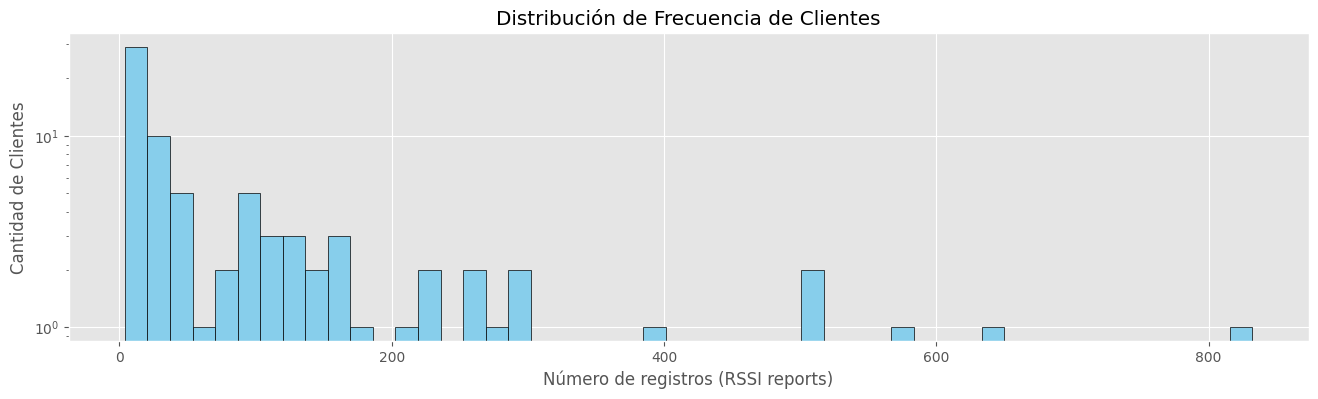

In [29]:
plt.figure(figsize=(16, 4))
plt.hist(freqs, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribución de Frecuencia de Clientes')
plt.xlabel('Número de registros (RSSI reports)')
plt.ylabel('Cantidad de Clientes')
plt.yscale('log') # Escala logarítmica suele ser mejor para estos datos
plt.show()

## 4. Filtrado de Clientes
Basado en el gráfico anterior, elige un `THRESHOLD`. Los clientes con más o igual cantidad de registros serán considerados frecuentes.

In [19]:
THRESHOLD = 20 # Cambia este valor según tu criterio

frequent, sporadic = ca.categorize_clients(freqs, THRESHOLD)

print(f"Umbral seleccionado: {THRESHOLD}")
print(f"Clientes Frecuentes: {len(frequent)}")
print(f"Clientes Esporádicos: {len(sporadic)}")

# Filtrar el DataFrame original para quedarnos con los frecuentes
df_frequent = ca.filter_by_clients(df, frequent)
print(f"\nRegistros originales: {len(df)}")
print(f"Registros de clientes frecuentes: {len(df_frequent)}")

Umbral seleccionado: 20
Clientes Frecuentes: 61
Clientes Esporádicos: 17

Registros originales: 8828
Registros de clientes frecuentes: 8640


## 5. Ejemplo de Datos Filtrados
Mostramos los primeros registros de los clientes frecuentes.

In [20]:
df_frequent.head()

,mac_cliente,mac_ap,banda,antena,rssi
0,8.212.12.130.83.142,0.66.104.213.240.0,0,0,-59
1,8.212.12.130.83.142,0.66.104.213.240.0,0,1,-56
2,8.212.12.130.83.142,0.66.104.213.240.0,1,0,-80
3,8.212.12.130.83.142,0.66.104.213.240.0,1,1,-78
4,8.212.12.130.83.142,44.208.45.106.167.16,0,0,-94


## 6. Análisis por banda

In [22]:
band_counts = df_frequent['banda'].value_counts()

print("Cantidad de registros por banda para clientes frecuentes:")
print(band_counts)

Cantidad de registros por banda para clientes frecuentes:
banda
0    6324
1    2316
Name: count, dtype: int64


Análisis de RSSI para clientes frecuentes por banda:
        count       mean        std    min   25%   50%   75%   max
banda                                                             
0      6324.0 -77.044592  19.982095 -100.0 -95.0 -84.5 -59.0 -30.0
1      2316.0 -67.220207  14.801928  -96.0 -80.0 -67.0 -55.0 -37.0


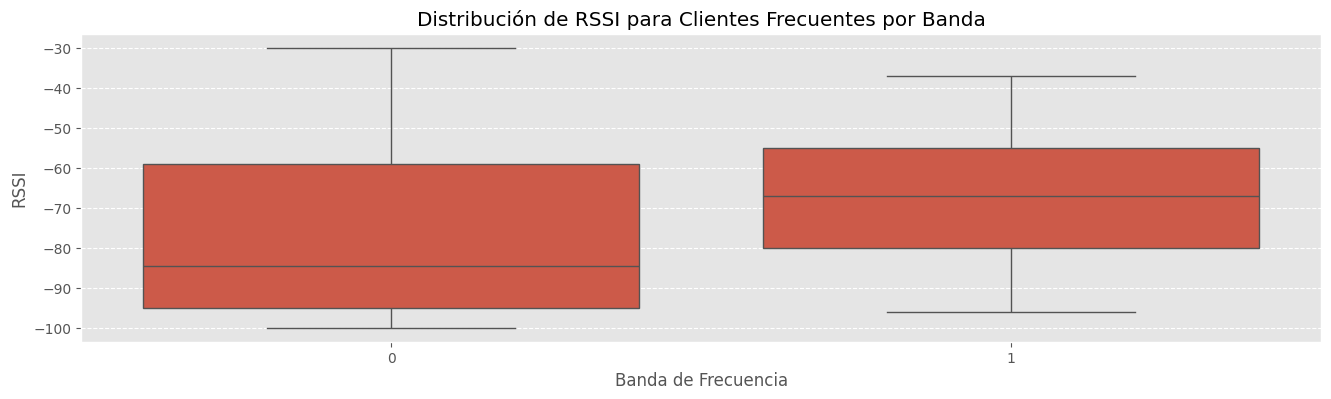

In [30]:
band_analysis = df_frequent.groupby('banda')['rssi'].describe()

print("Análisis de RSSI para clientes frecuentes por banda:")
print(band_analysis)

plt.figure(figsize=(16, 4))
sns.boxplot(x='banda', y='rssi', data=df_frequent)
plt.title('Distribución de RSSI para Clientes Frecuentes por Banda')
plt.xlabel('Banda de Frecuencia')
plt.ylabel('RSSI')
plt.grid(axis='y', linestyle='--')
plt.show()

## 7. Análisis de RSSI para Clientes Frecuentes por Antena

In [23]:
antena_analysis = df_frequent.groupby('antena')['rssi'].describe()

print("Análisis de RSSI para clientes frecuentes por antena:")
print(antena_analysis)

Análisis de RSSI para clientes frecuentes por antena:
         count       mean        std    min   25%   50%   75%   max
antena                                                             
0       4320.0 -74.664352  19.189452 -100.0 -93.0 -78.0 -58.0 -30.0
1       4320.0 -74.157870  19.274514  -99.0 -93.0 -77.0 -57.0 -31.0


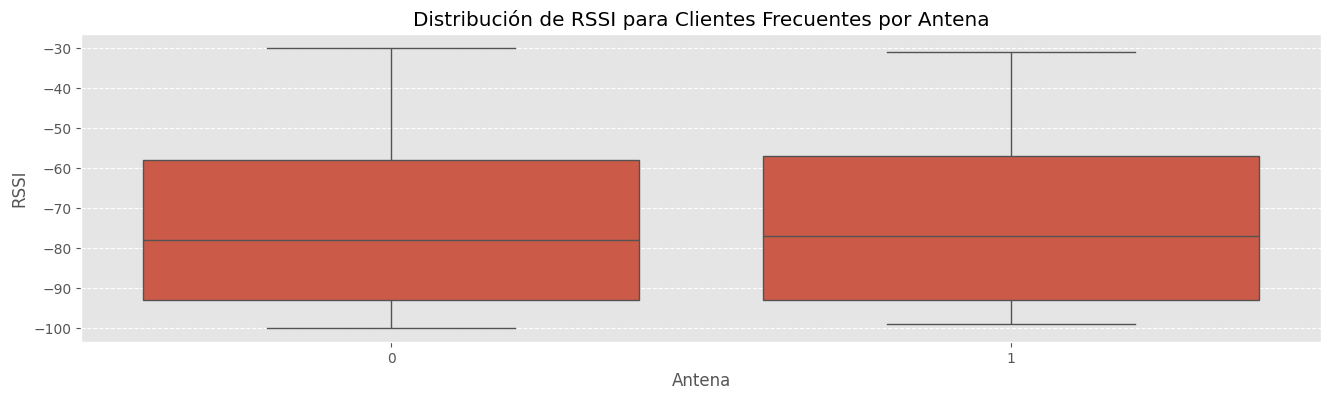

In [31]:
plt.figure(figsize=(16, 4))
sns.boxplot(x='antena', y='rssi', data=df_frequent)
plt.title('Distribución de RSSI para Clientes Frecuentes por Antena')
plt.xlabel('Antena')
plt.ylabel('RSSI')
plt.grid(axis='y', linestyle='--')
plt.show()